# CSCA 5642 Introduction to Deep Learning Week 3 Project

## 1. Brief description of the problem and data
### 1.1 Problem description
In this project, we aim to identify and classify metastatic cancer in small image patches taken from larger digital pathology scans.
The data of this project is from 

@misc{histopathologic-cancer-detection,
    author = {Will Cukierski},
    title = {Histopathologic Cancer Detection},
    publisher = {Kaggle},
    year = {2018},
    url = {https://kaggle.com/competitions/histopathologic-cancer-detection}
}

### 1.2 Data description
The data is composed of test and train folders containing approximately 5GB images, and a label csv file describing the label of the train dataset, namely is metastatic cancer(1) or not(0).
The training data's name is its unique ID, and the picture is unified in the same size of 96 * 96 with RGB channels.


## 2. Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data

### 2.1 Data Inspection
1) Distribution of Labels:
This count plot shows the distribution of labels (0 and 1), giving us an idea of how balanced the dataset is.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import numpy as np

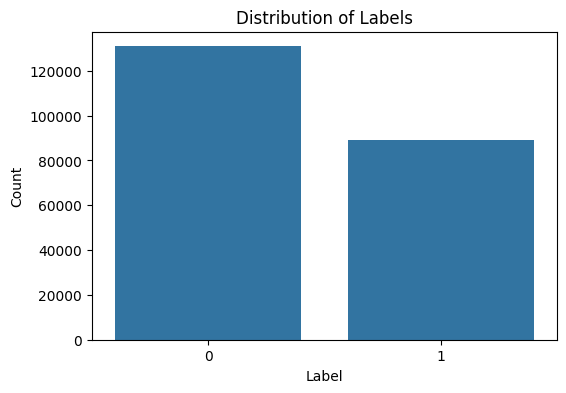

In [3]:
labels = pd.read_csv('data/train_labels.csv')
# Display the distribution of labels
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=labels)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

### 2.2 Data Visualization
1) sample Images:
This subplot displays a few sample images from the dataset to give a visual understanding of the image data.

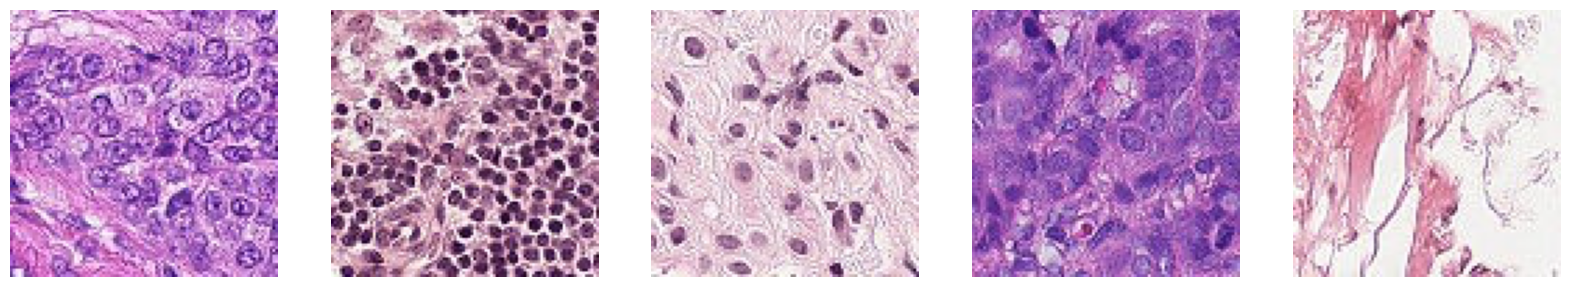

In [5]:
# Display some sample images
sample_images = labels.sample(5)['id'].values
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, img_id in enumerate(sample_images):
    img_path = os.path.join('data/train/', f'{img_id}.tif')
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
plt.show()

2) Mean and Standard Deviation of Pixel Values:
The bar plots show the mean and standard deviation of pixel values for the RGB channels in the sample images, providing insight into the color distribution and variability within the dataset.

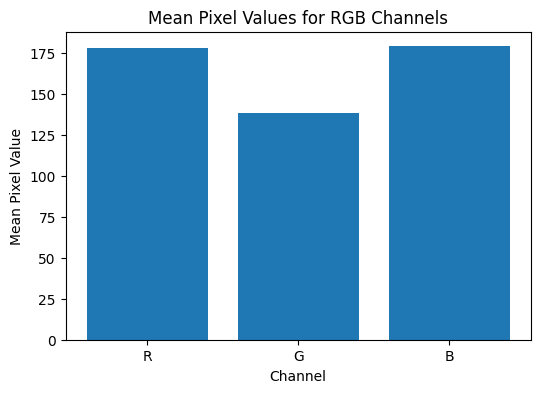

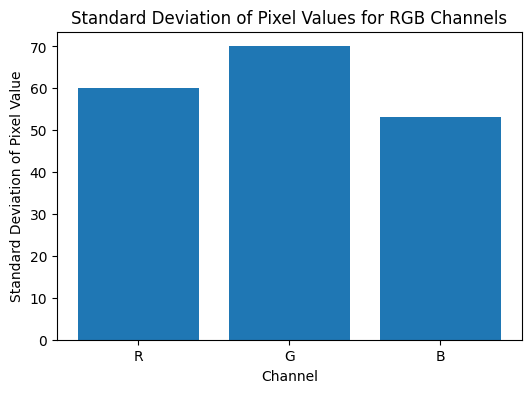

In [8]:
def load_images(image_ids, path, sample_size=100):
    images = []
    for img_id in image_ids[:sample_size]:
        img_path = os.path.join(path, f'{img_id}.tif')
        img = Image.open(img_path)
        img_array = np.array(img)
        images.append(img_array)
    return np.array(images)

sample_image_ids = labels['id'].values
images = load_images(sample_image_ids, 'data/train/')

mean_pixel_value = np.mean(images, axis=(0, 1, 2))
std_pixel_value = np.std(images, axis=(0, 1, 2))

# Plot mean pixel values
plt.figure(figsize=(6, 4))
plt.bar(['R', 'G', 'B'], mean_pixel_value)
plt.title('Mean Pixel Values for RGB Channels')
plt.xlabel('Channel')
plt.ylabel('Mean Pixel Value')
plt.show()

# Plot standard deviation of pixel values
plt.figure(figsize=(6, 4))
plt.bar(['R', 'G', 'B'], std_pixel_value)
plt.title('Standard Deviation of Pixel Values for RGB Channels')
plt.xlabel('Channel')
plt.ylabel('Standard Deviation of Pixel Value')
plt.show()


In [ ]:
pixels = images.flatten()
plt.figure(figsize=(6, 4))
plt.hist(pixels, bins=50, color='blue', alpha=0.7)
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

### 2.3 Data Cleaning
1) Inspect if the data has null.

In [6]:
print(labels.isnull().sum())

id       0
label    0
dtype: int64


2) Inspect if the data has duplicate or invalid label out of 1 or 0.

In [9]:
duplicates = labels['id'].duplicated().sum()
if duplicates > 0:
    print(f"There are {duplicates} duplicate IDs.")
else:
    print("No duplicate IDs found.")

# Check for invalid labels
invalid_labels = labels[~labels['label'].isin([0, 1])]
if not invalid_labels.empty:
    print(f"There are {len(invalid_labels)} invalid labels.")
    print(invalid_labels)
else:
    print("All labels are valid (0 or 1).")

No duplicate IDs found.
All labels are valid (0 or 1).


3) inspect if all image has the size of 96*96

In [ ]:
import os
from PIL import Image

# Function to check image sizes
def check_image_sizes(image_folder):
    incorrect_size_images = []
    for img_name in os.listdir(image_folder):
        img_path = os.path.join(image_folder, img_name)
        img = Image.open(img_path)
        if img.size != (96, 96):
            incorrect_size_images.append(img_name)
    return incorrect_size_images

# Check train images
train_folder = 'data/train'
incorrect_train_images = check_image_sizes(train_folder)

# Output the results
if len(incorrect_train_images) > 0:
    print(f"There are {len(incorrect_train_images)} images with incorrect sizes in the training set.")
    print(incorrect_train_images)
else:
    print("All training images have the correct size of 96x96.")

# Check test images if needed
test_folder = 'path/to/test'
incorrect_test_images = check_image_sizes(test_folder)

# Output the results
if len(incorrect_test_images) > 0:
    print(f"There are {len(incorrect_test_images)} images with incorrect sizes in the test set.")
    print(incorrect_test_images)
else:
    print("All test images have the correct size of 96x96.")

## 3. DModel Architecture

## 4. Results and Analysis 

## 5. Conclusion